# Recommendations

You have to use the data available in the dataset folder. 

Try to answer the questions using python and suitable visualizations.

Be clear and get straight to the point in your answers.

Good job!

<hr>

### Question 1

Try to clean/aggregate the data from crop_data.sql in order to avoid NULL (or NaN) and empty values.

Utilizei o pgAdmin 4 para a crianção da  tabelas edepois disso rodei aqui:

In [276]:
import pandas as pd
def get_table(table, column_names):
    import pandas as pd
    import psycopg2
    conn = psycopg2.connect(database="postgres",
                            host="localhost",
                            user="postgres",
                            password="123456",
                            port="5432")
    cursor = conn.cursor()
    cursor.execute(f'SELECT * FROM {table}')
    return pd.DataFrame(cursor.fetchall(), columns=column_names)

df = get_table('crop.crop_data', ['cod_nivel_territorial',
                                  'nivel_territorial',
                                  'cod_unidade_medida',
                                  'unidade_medida',
                                  'valor',
                                  'cod_municipio',
                                  'cod_ano',
                                  'ano',
                                  'cod_produto_lavouras_temporarias',
                                  'produto_lavouras_temporarias',
                                  'cod_variavel',
                                  'variavel'])

In [277]:
df['valor'] = pd.to_numeric(df['valor'], errors='coerce')  
df['valor'].fillna(0, inplace=True)
media_valor = df['valor'].mean()

print("Média de 'valor':", media_valor)

Média de 'valor': 57050.943683134996


In [278]:
df.describe()

,cod_nivel_territorial,cod_unidade_medida,valor,cod_municipio,cod_ano,ano,cod_produto_lavouras_temporarias,cod_variavel
count,16638.0,16638.000000,1.663800e+04,1.663800e+04,16638.000000,16638.000000,16638.000000,16638.000000
mean,6.0,728.610169,5.705094e+04,5.105245e+06,2017.381356,2017.381356,85895.745763,165.406780
std,0.0,441.804815,2.030676e+05,2.403726e+03,2.937052,2.937052,48569.719437,52.198756
min,6.0,33.000000,0.000000e+00,5.100102e+06,2012.000000,2012.000000,2713.000000,109.000000
25%,6.0,40.000000,0.000000e+00,5.103361e+06,2015.000000,2015.000000,2713.000000,112.000000
50%,6.0,1006.000000,3.000000e+03,5.106109e+06,2018.000000,2018.000000,114253.000000,214.000000
75%,6.0,1006.000000,1.766000e+04,5.107206e+06,2020.000000,2020.000000,114254.000000,215.000000
max,6.0,1017.000000,4.984707e+06,5.108956e+06,2022.000000,2022.000000,114254.000000,216.000000


<hr>

In [279]:
df_json = pd.read_json('../teste_seedz/dataset/ibge_municipios.json')

def remove_accents(a):
    import unidecode
    return unidecode.unidecode(str(a).encode().decode('utf-8')).upper().strip()

df_json['municipio'] = df_json['municipio'].apply(remove_accents)

df_json

,ibge_code,municipio
0,2500502,ALAGOINHA
1,2923704,PARATINGA
2,2109056,PORTO RICO DO MARANHAO
3,3513306,CRUZALIA
4,2206506,MONSENHOR HIPOLITO
...,...,...
10291,2615102,TEREZINHA
10292,2909505,CRAVOLANDIA
10293,5201405,APARECIDA DE GOIANIA
10294,5214804,NOVA AURORA


In [280]:
ibge = pd.merge(df, df_json, left_on='cod_municipio', right_on='ibge_code', how='inner')

ibge.head()

,cod_nivel_territorial,nivel_territorial,cod_unidade_medida,unidade_medida,valor,cod_municipio,cod_ano,ano,cod_produto_lavouras_temporarias,produto_lavouras_temporarias,cod_variavel,variavel,ibge_code,municipio
0,6,Município,1006,Hectares,0.0,5108402,2016,2016,2713,Soja (em grão),109,Área plantada,5108402,VARZEA GRANDE
1,6,Município,1006,Hectares,0.0,5108402,2016,2016,2713,Soja (em grão),109,Área plantada,5108402,VARZEA GRANDE
2,6,Município,1006,Hectares,0.0,5108402,2016,2016,2713,Soja (em grão),216,Área colhida,5108402,VARZEA GRANDE
3,6,Município,1006,Hectares,0.0,5108402,2016,2016,2713,Soja (em grão),216,Área colhida,5108402,VARZEA GRANDE
4,6,Município,1017,Toneladas,0.0,5108402,2016,2016,2713,Soja (em grão),214,Quantidade produzida,5108402,VARZEA GRANDE


In [281]:
ibge = ibge.drop_duplicates()

In [363]:
ibge[['cod_unidade_medida', 'unidade_medida', 'cod_produto_lavouras_temporarias']].value_counts()

cod_unidade_medida  unidade_medida           cod_produto_lavouras_temporarias
1006                Hectares                 114253                              3190
                                             114254                              3190
                                             2713                                1740
33                  Quilogramas por Hectare  114253                              1595
                                             114254                              1595
1017                Toneladas                114253                              1595
                                             114254                              1595
33                  Quilogramas por Hectare  2713                                 870
40                  Mil Reais                2713                                 870
1017                Toneladas                2713                                 870
Name: count, dtype: int64

Entendendo que hectares, quilogramas por hectare, toneladas e Mil Reais sao medidas muito diferentes, para fazer a media foi utilizado apenas as colunas 
toneladas e quilogramas por hectare. Uma noticia que traz um pouco dos valores oficiais por essas medidas: [Safra de grãos é estimada em 313 milhões de toneladas impulsionada pela soja - 11/2022](https://www.gov.br/pt-br/noticias/agricultura-e-pecuaria/2022/11/safra-de-graos-e-estimada-em-313-milhoes-de-toneladas-impulsionada-pela-soja#:~:text=No%20geral%2C%20a%20%C3%A1rea%20semeada,Nacional%20de%20Abastecimento%20(Conab)).

### Question 2

What was the production mean of soybean for each city throughout 2020?

In [283]:
df_2020 = ibge[ibge['ano'] == 2020]
df_2020 = df_2020[df_2020['cod_produto_lavouras_temporarias'] == 2713]
result_df = df_2020.groupby(['municipio', 'cod_unidade_medida'])['valor'].mean().reset_index()
result_df = result_df.rename(columns={'valor': 'producao_media'})
result_df = result_df.sort_values(by='producao_media', ascending=False)


result_df.sample(10)
# entendendo que cada medida tem sua especificidade (quilograma por hectare, hectare, etc), fiz um agrupamento utilizando o codigo para que pudesse obter a media 
# da unidade medida por municipio com o df filtrado pelo ano solicitado e pelo produto solicitado (nesse caso, soja cd 2713).

,municipio,cod_unidade_medida,producao_media
174,FELIZ NATAL,1006,142000.0
149,COTRIGUACU,40,3646.0
354,NOVA XAVANTINA,1006,65000.0
403,PONTE BRANCA,1017,342.0
528,SINOP,33,3780.0
287,MIRASSOL DOESTE,1017,11096.0
393,POCONE,40,42201.0
108,CASTANHEIRA,33,0.0
109,CASTANHEIRA,40,0.0
490,SANTO ANTONIO DO LESTE,1006,96027.0


In [284]:
# exemplo de filtro por municipio, tendo a média de produção por tipo de unidade medida
result_df[result_df['municipio'] == 'CAMPINAPOLIS']

,municipio,cod_unidade_medida,producao_media
81,CAMPINAPOLIS,40,131328.0
83,CAMPINAPOLIS,1017,109440.0
82,CAMPINAPOLIS,1006,30400.0
80,CAMPINAPOLIS,33,3600.0


<hr>

### Question 3

Show the top 10 cities with the best production mean for each crop product throughout the years.

In [285]:
# considerando um ranking separado pelas unidades medidas separadamente
result_df_2 = ibge.groupby(['produto_lavouras_temporarias', 'ano', 'cod_unidade_medida', 'municipio'])['valor'].mean().round(2).reset_index()
result_df_2 = result_df_2.rename(columns={'valor': 'producao_media'})

# classificanod o df resultante pelo valor da produção média em ordem decrescente para cada produto, ano e código de medida
rankings = {}
for produto, grupo_produto in result_df_2.groupby('produto_lavouras_temporarias'):
    rankings[produto] = {}
    for ano, grupo_ano in grupo_produto.groupby('ano'):
        rankings[produto][ano] = {}
        for codigo_medida, grupo_codigo in grupo_ano.groupby('cod_unidade_medida'):
            ranking = grupo_codigo.sort_values(by='producao_media', ascending=False).head(10)
            rankings[produto][ano][codigo_medida] = ranking

for produto, ranking_por_ano in rankings.items():
    print(f"Ranking para {produto}:")
    for ano, ranking_por_codigo in ranking_por_ano.items():
        print(f"Ano {ano}:")
        for codigo_medida, ranking in ranking_por_codigo.items():
            print(f"Código de Medida {codigo_medida}:")
            print(ranking)

Ranking para Milho (em grão) - 1ª safra:
Ano 2012:
Código de Medida 33:
    produto_lavouras_temporarias   ano  cod_unidade_medida   
51    Milho (em grão) - 1ª safra  2012                  33  \
5     Milho (em grão) - 1ª safra  2012                  33   
114   Milho (em grão) - 1ª safra  2012                  33   
108   Milho (em grão) - 1ª safra  2012                  33   
137   Milho (em grão) - 1ª safra  2012                  33   
22    Milho (em grão) - 1ª safra  2012                  33   
124   Milho (em grão) - 1ª safra  2012                  33   
88    Milho (em grão) - 1ª safra  2012                  33   
106   Milho (em grão) - 1ª safra  2012                  33   
130   Milho (em grão) - 1ª safra  2012                  33   

                 municipio  producao_media  
51              GUIRATINGA          9600.0  
5              ALTO GARCAS          9600.0  
114           RONDONOPOLIS          9000.0  
108              QUERENCIA          8820.0  
137                T

<hr>

In [286]:
# considerando um ranking de producao sem considerar diferenca nas unidades medidas
result_df_3 = ibge.groupby(['produto_lavouras_temporarias', 'ano', 'municipio'])['valor'].mean().round(2).reset_index()
result_df_3 = result_df_3.rename(columns={'valor': 'producao_media'})

# Classificando o df resultante pelo valor da produção média em ordem decrescente para cada produto e ano
rankings = {}
for produto, grupo_produto in result_df_3.groupby('produto_lavouras_temporarias'):
    rankings[produto] = {}
    for ano, grupo_ano in grupo_produto.groupby('ano'):
        ranking = grupo_ano.sort_values(by='producao_media', ascending=False).head(10)
        rankings[produto][ano] = ranking

for produto, ranking_por_ano in rankings.items():
    print(f"Ranking para {produto}:")
    for ano, ranking in ranking_por_ano.items():
        print(f"Ano {ano}:")
        print(ranking)

Ranking para Milho (em grão) - 1ª safra:
Ano 2012:
    produto_lavouras_temporarias   ano              municipio  producao_media
130   Milho (em grão) - 1ª safra  2012                SAPEZAL        20917.00
7     Milho (em grão) - 1ª safra  2012           ALTO TAQUARI        13500.00
56    Milho (em grão) - 1ª safra  2012               ITIQUIRA        13220.00
21    Milho (em grão) - 1ª safra  2012  CAMPO NOVO DO PARECIS        12000.00
23    Milho (em grão) - 1ª safra  2012        CAMPOS DE JULIO        11496.75
5     Milho (em grão) - 1ª safra  2012            ALTO GARCAS        11100.00
114   Milho (em grão) - 1ª safra  2012           RONDONOPOLIS         9400.00
111   Milho (em grão) - 1ª safra  2012          RIBEIRAOZINHO         9300.00
88    Milho (em grão) - 1ª safra  2012         NOVA XAVANTINA         8600.00
22    Milho (em grão) - 1ª safra  2012            CAMPO VERDE         8600.00
Ano 2013:
    produto_lavouras_temporarias   ano              municipio  producao_media
275

### Question 4

Which city has the highest growth in corn crop land throughout the years?

In [287]:
# filtro por produto
milho_df = ibge[ibge['produto_lavouras_temporarias'].isin(['Milho (em grão) - 1ª safra', 'Milho (em grão) - 2ª safra'])]
#agrupamento por ano, unidade medida e municipio e depois calcular a área total de cultivo de milho
milho_agrupado = milho_df.groupby(['ano', 'cod_unidade_medida', 'municipio'])['valor'].sum().reset_index()

# crescimento ano a ano para cada cidade e código de unidade de medida
milho_agrupado['crescimento'] = milho_agrupado.groupby(['cod_unidade_medida', 'municipio'])['valor'].diff()
# como nao temos 2011 na base para comparar, preenchendo com 0 para que nao haja nan no ranking
milho_agrupado['crescimento'].fillna(0, inplace=True)
# ranking para cada ano e código de unidade de medida
rankings = {}
for ano in milho_agrupado['ano'].unique():
    rankings[ano] = {}
    for codigo_medida in milho_agrupado['cod_unidade_medida'].unique():
        subset = milho_agrupado[(milho_agrupado['ano'] == ano) & (milho_agrupado['cod_unidade_medida'] == codigo_medida)]
        ranking = subset.sort_values(by='crescimento', ascending=False)
        rankings[ano][codigo_medida] = ranking

for ano, ranking_por_codigo in rankings.items():
    for codigo_medida, ranking in ranking_por_codigo.items():
        print(f"Ano {ano}, Código de Medida {codigo_medida}:")
        print(ranking) # note que a medida que distribui o ranking é o crescimento, indo do maior para o menor crescimento ano após ano.

Ano 2012, Código de Medida 33:
      ano  cod_unidade_medida          municipio    valor  crescimento
0    2012                  33           ACORIZAL   2000.0          0.0
73   2012                  33        NORTELANDIA   5400.0          0.0
93   2012                  33          PARANAITA   3600.0          0.0
94   2012                  33        PARANATINGA   8713.0          0.0
95   2012                  33        PEDRA PRETA   7500.0          0.0
..    ...                 ...                ...      ...          ...
49   2012                  33      GLORIA DOESTE   2700.0          0.0
50   2012                  33  GUARANTA DO NORTE   8100.0          0.0
51   2012                  33         GUIRATINGA  15600.0          0.0
52   2012                  33           INDIAVAI   3000.0          0.0
144  2012                  33          VILA RICA   5400.0          0.0

[145 rows x 5 columns]
Ano 2012, Código de Medida 1006:
      ano  cod_unidade_medida          municipio    valor  c

<hr>

### Question 5

What is the growth rate of soybean crop land from 2017 to 2022 for each city?

In [288]:
import numpy as np
# separando apenas a soja no df
soja_df = ibge[ibge['produto_lavouras_temporarias'] == 'Soja (em grão)']

# Agrupar por cidade e ano e calcular a área total de terras cultivadas com soja
soja_agrupada = soja_df.groupby(['municipio', 'ano', 'cod_unidade_medida'])['valor'].sum().reset_index()

# Calcular a taxa de crescimento anual para cada cidade
taxa_crescimento = {}
cidades = soja_agrupada['municipio'].unique()
codigos_unidade_medida = soja_agrupada['cod_unidade_medida'].unique()

for codigo_unidade_medida in codigos_unidade_medida:
    taxa_crescimento[codigo_unidade_medida] = {}
    
    for cidade in cidades:
        cidade_data = soja_agrupada[(soja_agrupada['municipio'] == cidade) & (soja_agrupada['cod_unidade_medida'] == codigo_unidade_medida)]
        cidade_data = cidade_data.sort_values(by='ano')
        
        # Calcular a taxa de crescimento anual
        cidade_data['taxa_crescimento'] = cidade_data['valor'].pct_change() * 100
        
        # Remover o primeiro ano (2017) para evitar NaN na taxa de crescimento
        cidade_data = cidade_data[cidade_data['ano'] != 2017]
        
        # Calcular a taxa de crescimento média de 2017 a 2022
        taxa_media = cidade_data['taxa_crescimento'].mean()
        
        taxa_crescimento[codigo_unidade_medida][cidade] = taxa_media

# Converter o resultado em um DataFrame
result_df_4 = pd.DataFrame(taxa_crescimento)

result_df_4.replace([np.inf, -np.inf], np.nan, inplace=True)
result_df_4

,33,40,1006,1017
ACORIZAL,NaN,NaN,NaN,NaN
AGUA BOA,1.668752,42.458089,5.363180,7.328924
ALTA FLORESTA,0.189394,57.162063,18.966041,19.393415
ALTO ARAGUAIA,1.738375,51.253759,7.651118,9.743148
ALTO BOA VISTA,1.895864,42.394679,7.506263,9.607531
...,...,...,...,...
VALE DE SAO DOMINGOS,NaN,NaN,NaN,NaN
VARZEA GRANDE,NaN,NaN,NaN,NaN
VERA,-1.046021,38.089428,4.875293,3.777542
VILA BELA DA SANTISSIMA TRINDADE,1.011456,66.127807,21.994979,23.694704


In [289]:
# lembrando que municipios que não contém informação na coluna valor (0) nao tiveram seus calculos concretizados. Valores infinitos também foram
# substituidos por NaN

<hr>

### Question 6

Which features from crop_data.sql have some correlation with commodities price?

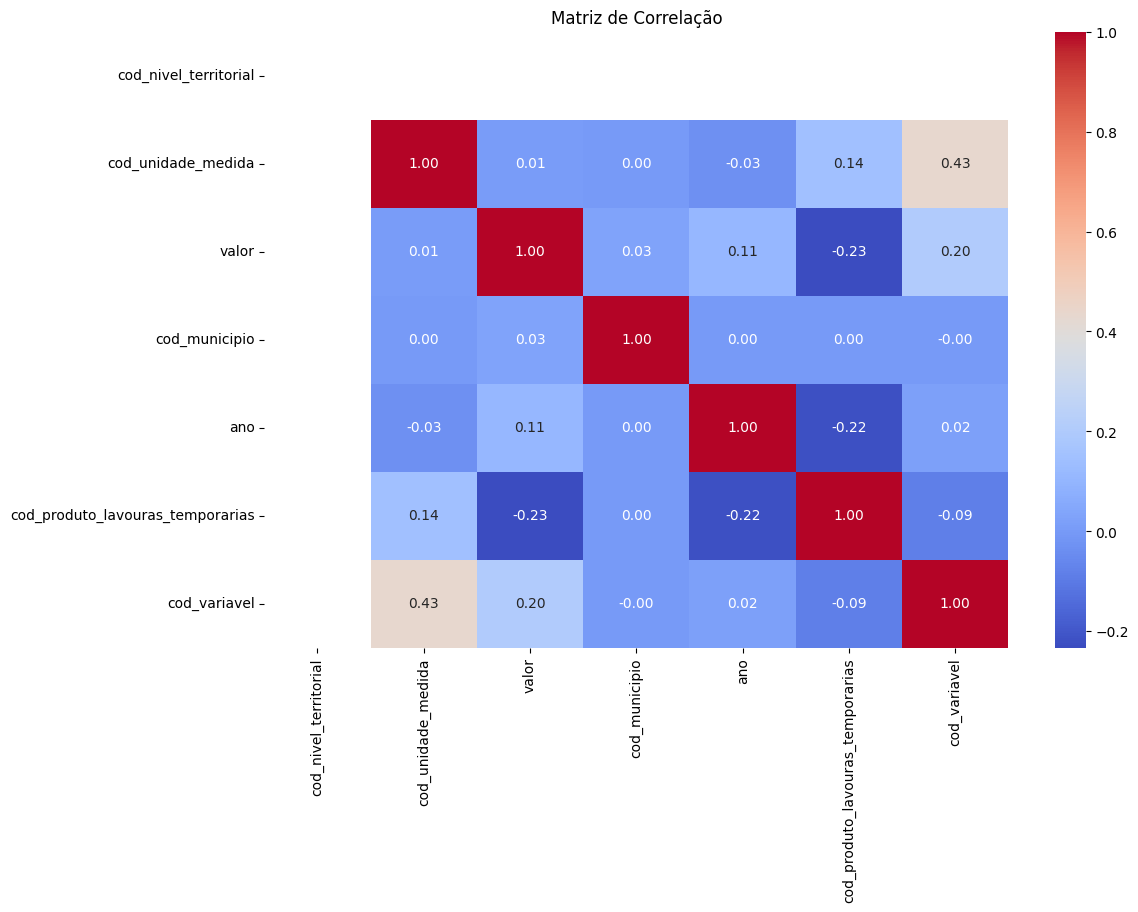

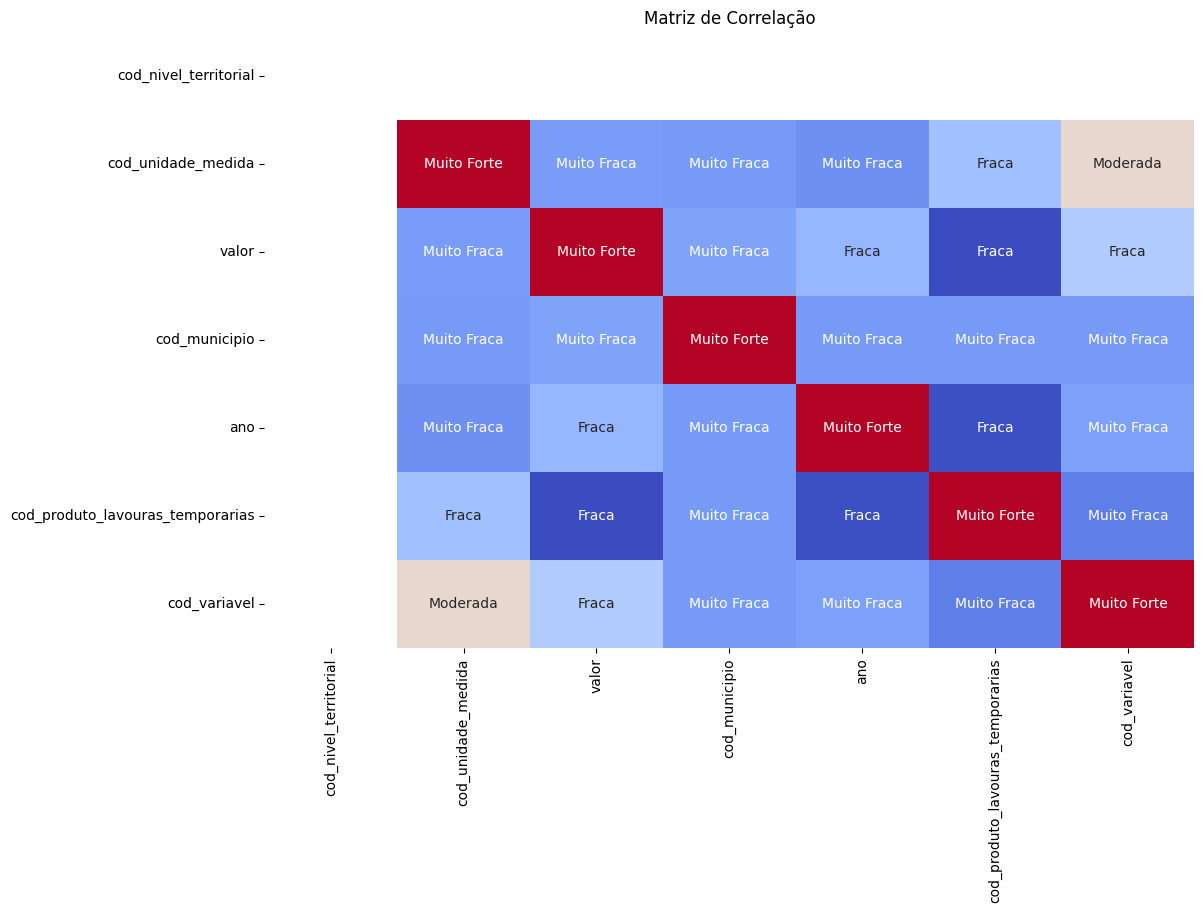

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt

numbers = ibge.select_dtypes(include=['float64', 'int64'])
numbers = numbers.drop(['cod_ano', 'ibge_code'], axis=1)


correlation_matrix = numbers.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

labels = [
    ['Muito Forte', 'Forte', 'Moderada', 'Fraca'],
    ['Forte', 'Moderada', 'Fraca', 'Muito Fraca']
]

# matriz de rótulos com base nos valores da matriz de correlação
labels_matrix = [['' for _ in range(len(correlation_matrix.columns))] for _ in range(len(correlation_matrix.columns))]

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        val = correlation_matrix.iloc[i, j]
        if val >= 0.7:
            labels_matrix[i][j] = labels[0][0]  #muito forte - Positiva
        elif 0.5 <= val < 0.7:
            labels_matrix[i][j] = labels[0][1]  # forte - Positiva
        elif 0.3 <= val < 0.5:
            labels_matrix[i][j] = labels[0][2]  # moderada - Positiva
        elif 0.1 <= val < 0.3:
            labels_matrix[i][j] = labels[0][3]  # fraca - Positiva
        elif -0.1 < val < 0.1:
            labels_matrix[i][j] = labels[1][3]  # fraca - Negativa
        elif -0.3 < val <= -0.1:
            labels_matrix[i][j] = labels[1][2]  # moderada - Negativa
        elif -0.5 < val <= -0.3:
            labels_matrix[i][j] = labels[1][1]  # forte - Negativa
        elif val <= -0.7:
            labels_matrix[i][j] = labels[1][0]  # muito forte - Negativa

# heatmap com rótulos
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=labels_matrix, cmap='coolwarm', fmt='', cbar=False)
plt.title("Matriz de Correlação")
plt.show()

In [291]:
# considerando que os preços das commodities estão na coluna VALOR (nao foi enviado dicionário de dados, portanto, inferência), nenhuma das variáveis numéricas 
# tem correlação media/forte com essa variável. Todas apresentam uma correlação fraca/muito fraca conforme demonstrado nas matrizes.
# atenção para a variavel com o codigo dos produtos (soja, milho 1 safra e milho 2 safra) que apresenta a maior correlaçào com a var valor. Mesmo que fraca, a correelação negativa
# é a única acima de 0.20 (0.23). Isso significa que existe certa sensibilidade quanto ao valor/produto.



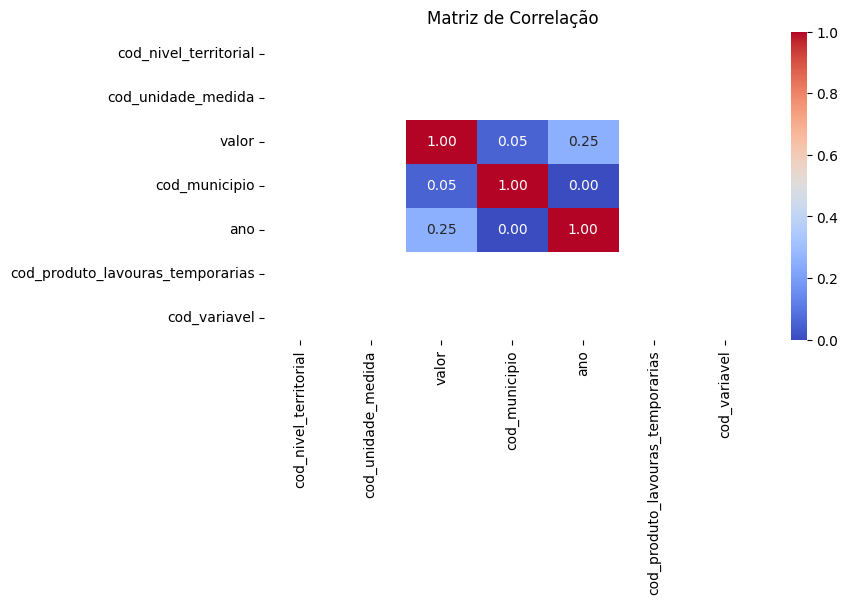

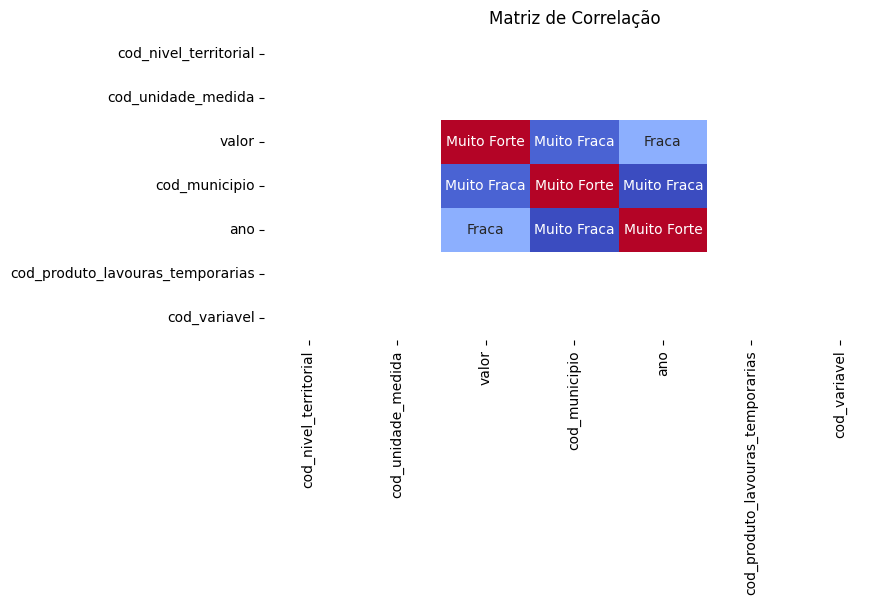

In [294]:
# supondo que o unico valor de commodities na coluna valor seja "Mil Reais", segue matriz:

import seaborn as sns
import matplotlib.pyplot as plt

numbers_40 = ibge.select_dtypes(include=['float64', 'int64'])
numbers_40 = numbers_40.drop(['cod_ano', 'ibge_code'], axis=1)
numbers_40 = numbers_40[numbers_40['cod_unidade_medida'] == 40]

correlation_matrix = numbers_40.corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

labels = [
    ['Muito Forte', 'Forte', 'Moderada', 'Fraca'],
    ['Forte', 'Moderada', 'Fraca', 'Muito Fraca']
]

# matriz de rótulos com base nos valores da matriz de correlação
labels_matrix = [['' for _ in range(len(correlation_matrix.columns))] for _ in range(len(correlation_matrix.columns))]

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        val = correlation_matrix.iloc[i, j]
        if val >= 0.7:
            labels_matrix[i][j] = labels[0][0]  #muito forte - Positiva
        elif 0.5 <= val < 0.7:
            labels_matrix[i][j] = labels[0][1]  # forte - Positiva
        elif 0.3 <= val < 0.5:
            labels_matrix[i][j] = labels[0][2]  # moderada - Positiva
        elif 0.1 <= val < 0.3:
            labels_matrix[i][j] = labels[0][3]  # fraca - Positiva
        elif -0.1 < val < 0.1:
            labels_matrix[i][j] = labels[1][3]  # fraca - Negativa
        elif -0.3 < val <= -0.1:
            labels_matrix[i][j] = labels[1][2]  # moderada - Negativa
        elif -0.5 < val <= -0.3:
            labels_matrix[i][j] = labels[1][1]  # forte - Negativa
        elif val <= -0.7:
            labels_matrix[i][j] = labels[1][0]  # muito forte - Negativa

# heatmap com rótulos
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=labels_matrix, cmap='coolwarm', fmt='', cbar=False)
plt.title("Matriz de Correlação")
plt.show()

In [298]:
# para esse filtro, notamos que só existem dados registrados para a soja (2713). Nese caso, temos uma correlação acima das outras com o ano de produção. Isso está explicito na questão 8, onde uma breve anal;ise exploratoria dos dados é feita e um grafico de produção ao longo dos anos é plotado. Vê-se que a soja teve um grande crescimento ao longo dos anos, tendo um crescimento expressivo a partir de 2020.

<hr>

### Question 7

Create time-series plots using python to show the correlations found in the previous question.

C:\Users\marinaferreira\AppData\Local\Temp\ipykernel_11860\2295002210.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_data, x='ano', y=variable1, palette="tab10", linewidth=2, label=variable1)
C:\Users\marinaferreira\AppData\Local\Temp\ipykernel_11860\2295002210.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=grouped_data, x='ano', y=variable2, palette="tab10", linewidth=2, label=variable2)


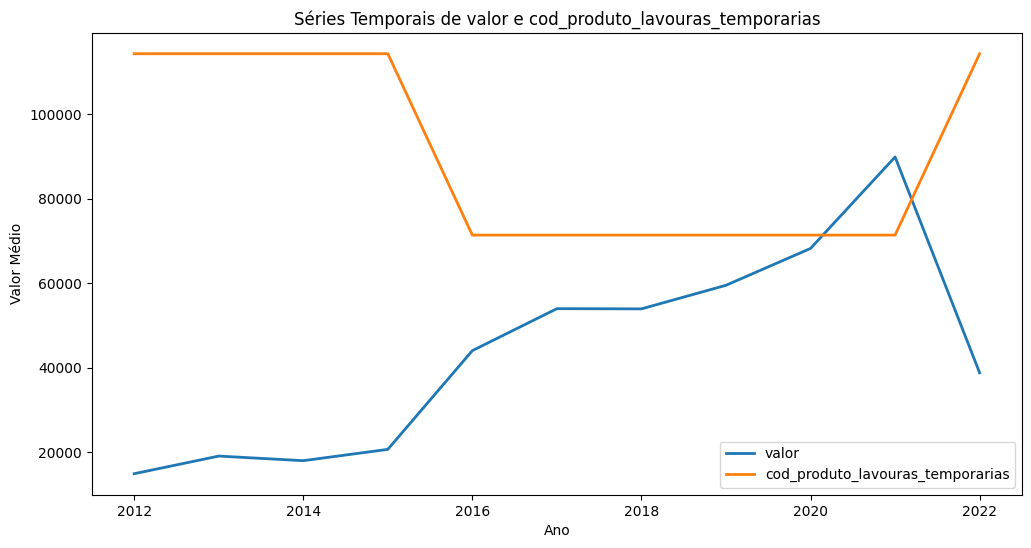

In [222]:
variable1 = 'valor'
variable2 = 'cod_produto_lavouras_temporarias'
grouped_data = numbers.groupby('ano')[[variable1, variable2]].mean()

# Redefina o índice para garantir que 'ano' seja tratado como coluna de dados
grouped_data.reset_index(inplace=True)

# Plote as séries temporais com legendas
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='ano', y=variable1, palette="tab10", linewidth=2, label=variable1)
sns.lineplot(data=grouped_data, x='ano', y=variable2, palette="tab10", linewidth=2, label=variable2)
plt.title(f"Séries Temporais de {variable1} e {variable2}")
plt.xlabel("Ano")
plt.ylabel("Valor Médio")
plt.legend()
plt.show()

In [223]:
# como pôde-se ver pelo grafico, são momentos explícitos que descrevem a correlação negativa de ambas, mesmo que não seja tao forte. Em 2020/21 houve um aumento de
# preços enquanto os produtos se mantiveram, tendo uma subida ali por 2021, acompanhado pela queda do preço, onde ambas seguem caminhos opostos.

<hr>

### Question 8

Make an exploratory analysis under the data and present your insights.

In [ ]:
# 114254	Milho (em grão) - 2ª safra	
# 114253	Milho (em grão) - 1ª safra	
# 2713 - soja

Produtos Agrícolas Únicos: [  2713 114253 114254]
Produção Média por Produto:
cod_produto_lavouras_temporarias
2713      114717.705449
114253      1429.365166
114254     49749.504480
Name: valor, dtype: float64
Produção Média por Cidade:
municipio
ACORIZAL                               166.016949
AGUA BOA                             94189.881356
ALTA FLORESTA                        17778.957627
ALTO ARAGUAIA                        26998.855932
ALTO BOA VISTA                       18093.516949
                                        ...      
VALE DE SAO DOMINGOS                  1512.567797
VARZEA GRANDE                          296.466102
VERA                                134170.084746
VILA BELA DA SANTISSIMA TRINDADE     20468.483051
VILA RICA                            33105.127119
Name: valor, Length: 145, dtype: float64


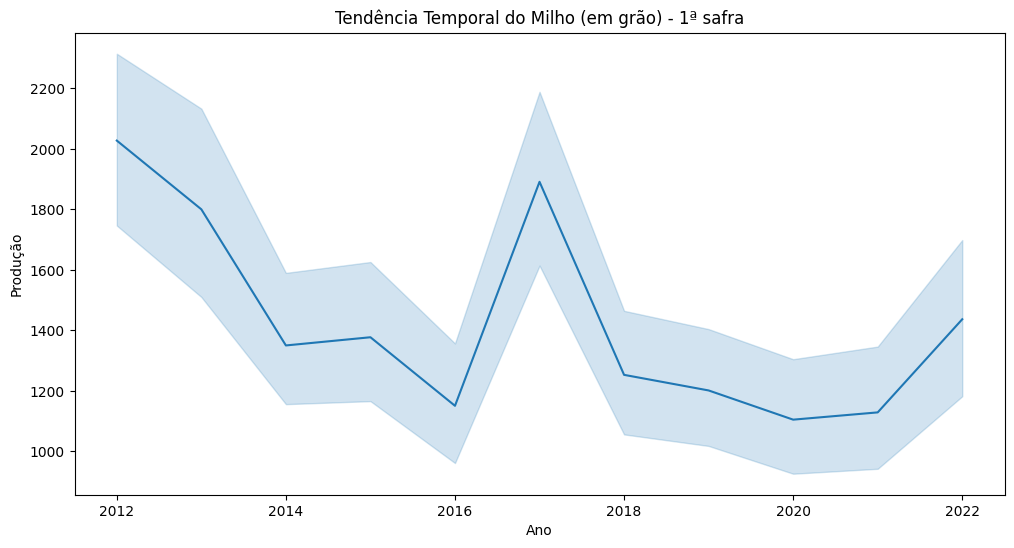

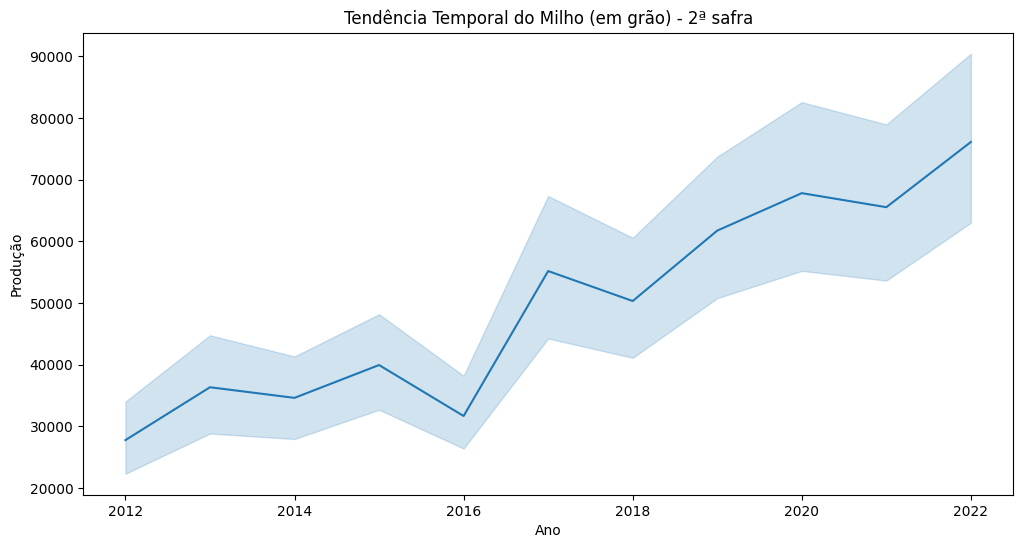

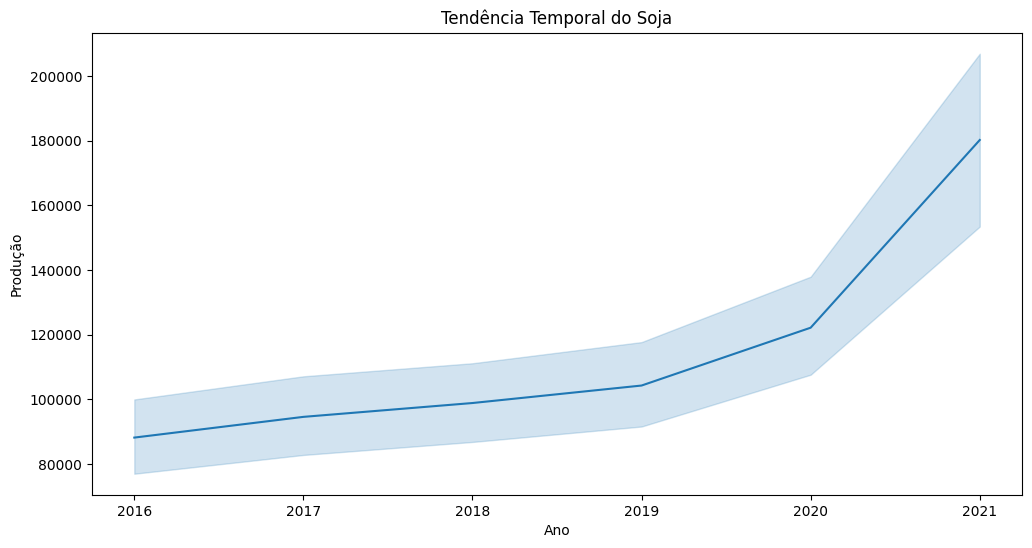

In [230]:
# Produtos Agrícolas Únicos
produtos_unicos = ibge['cod_produto_lavouras_temporarias'].unique()
print("Produtos Agrícolas Únicos:", produtos_unicos)

# Análise de Produção por Produto
producao_media_por_produto = ibge.groupby('cod_produto_lavouras_temporarias')['valor'].mean()
print("Produção Média por Produto:")
print(producao_media_por_produto)

# Análise de Produção por Cidade
producao_media_por_cidade = ibge.groupby('municipio')['valor'].mean()
print("Produção Média por Cidade:")
print(producao_media_por_cidade)

# Tendências Temporais para um Produto Específico (substitua 'produto_x' pelo código real)
produto_milho = ibge[ibge['cod_produto_lavouras_temporarias'] == 114253]
plt.figure(figsize=(12, 6))
sns.lineplot(data=produto_milho, x='ano', y='valor')
plt.title("Tendência Temporal do Milho (em grão) - 1ª safra")
plt.xlabel("Ano")
plt.ylabel("Produção")
plt.show()

# Tendências Temporais para um Produto Específico (substitua 'produto_x' pelo código real)
produto_milho = ibge[ibge['cod_produto_lavouras_temporarias'] == 114254]
plt.figure(figsize=(12, 6))
sns.lineplot(data=produto_milho, x='ano', y='valor')
plt.title("Tendência Temporal do Milho (em grão) - 2ª safra")
plt.xlabel("Ano")
plt.ylabel("Produção")
plt.show()

# Tendências Temporais para um Produto Específico (substitua 'produto_x' pelo código real)
produto_milho = ibge[ibge['cod_produto_lavouras_temporarias'] == 2713]
plt.figure(figsize=(12, 6))
sns.lineplot(data=produto_milho, x='ano', y='valor')
plt.title("Tendência Temporal do Soja")
plt.xlabel("Ano")
plt.ylabel("Produção")
plt.show()

Nota-se nesses graficos que a produção de soja tem crescido bastante ao longo dos ultimos anos, superando o ritmo de crescimento de 2019 para trás, onde o crescimento é mais suave deum ano para outrop.
No caso do milho da 1 safra, temos um grafico mais irregular. Com um eixo Y bem menor que a produção do milho da safrinha (2 safra), pode-se inferir que com o tempo, o aumento da produção da safrinha aumentou e até mesmo superou a produção da safra, conforme descrito aqui: [9 perguntas e respostas que você deve saber para obter alta produtividade de milho safrinha](https://blog.aegro.com.br/milho-safrinha/#:~:text=O%20milho%20safrinha%20(%202%C2%AA%20safra,vai%20de%20janeiro%20a%20abril.)). A partir de 2021 a produção da safrinha ja superava a produção da safra tendo expressivo aumento ao longo dos anos, conforme podemois ver no grafico plotado aqui.



In [311]:
milho_df_1 = ibge[ibge['produto_lavouras_temporarias'] == 'Milho (em grão) - 1ª safra']
milho_df_2 = ibge[ibge['produto_lavouras_temporarias'] == 'Milho (em grão) - 2ª safra']
soja_df = ibge[ibge['produto_lavouras_temporarias'] == 'Soja (em grão)']

# Agrupar por cidade e calcular a produção total ao longo dos anos para milho
producao_milho_1 = milho_df_1.groupby('municipio')['valor'].sum().reset_index()
producao_milho_2 = milho_df_2.groupby('municipio')['valor'].sum().reset_index()
producao_milho_1.rename(columns={'valor': 'producao_milho'}, inplace=True)
producao_milho_2.rename(columns={'valor': 'producao_milho'}, inplace=True)
# Agrupar por cidade e calcular a produção total ao longo dos anos para soja
producao_soja = soja_df.groupby('municipio')['valor'].sum().reset_index()
producao_soja.rename(columns={'valor': 'producao_soja'}, inplace=True)

# Encontrar a cidade que mais produziu milho
cidade_mais_producao_milho1 = producao_milho_1.loc[producao_milho_1['producao_milho'].idxmax()]
cidade_mais_producao_milho2 = producao_milho_2.loc[producao_milho_2['producao_milho'].idxmax()]
# Encontrar a cidade que mais produziu soja
cidade_mais_producao_soja = producao_soja.loc[producao_soja['producao_soja'].idxmax()]

print("Cidade que mais produziu Milho 1 safra nos ultimos 10 anos (2012-2022):")
print(cidade_mais_producao_milho1)
print("Cidade que mais produziu Milho 2 safra nos ultimos 10 anos (2012-2022):")
print(cidade_mais_producao_milho2)

print("\nCidade que mais produziu Soja no período de 2016-2021:")
print(cidade_mais_producao_soja)


Cidade que mais produziu Milho 1 safra nos ultimos 10 anos (2012-2022):
municipio         ITIQUIRA
producao_milho    395672.0
Name: 56, dtype: object
Cidade que mais produziu Milho 2 safra nos ultimos 10 anos (2012-2022):
municipio         NOVA MUTUM
producao_milho    20152008.0
Name: 83, dtype: object

Cidade que mais produziu Soja no período de 2016-2021:
municipio        NOVA MUTUM
producao_soja    22825974.0
Name: 83, dtype: object


In [329]:
unidade_milho1 = milho_df_1.groupby('unidade_medida',)['valor'].sum().reset_index()
unidade_milho1.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_milho1

,unidade_medida,producao_total
0,Hectares,1377078.0
1,Quilogramas por Hectare,4183730.0
2,Toneladas,4075324.0


<strong>Hectares</strong>: A produção total em hectares é de 1377078 hectares. </br>
<strong>Quilogramas por Hectare</strong>: A produção total em quilogramas por hectare é de 4183730 quilogramas por hectare. Essa unidade de medida indica a quantidade média de quilogramas produzidos em cada hectare de terra.</br>
<strong>Toneladas</strong>: A produção total em toneladas é de 4075324 toneladas. Essa unidade de medida representa a quantidade total de produção em toneladas.

In [330]:
unidade_milho_ano1 = milho_df_1.groupby(['unidade_medida', 'ano'])['valor'].sum().reset_index()
unidade_milho_ano1.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_milho_ano1

,unidade_medida,ano,producao_total
0,Hectares,2012,189274.0
1,Hectares,2013,175940.0
2,Hectares,2014,121686.0
3,Hectares,2015,112184.0
4,Hectares,2016,92574.0
5,Hectares,2017,159708.0
6,Hectares,2018,102256.0
7,Hectares,2019,96554.0
8,Hectares,2020,88936.0
9,Hectares,2021,99362.0


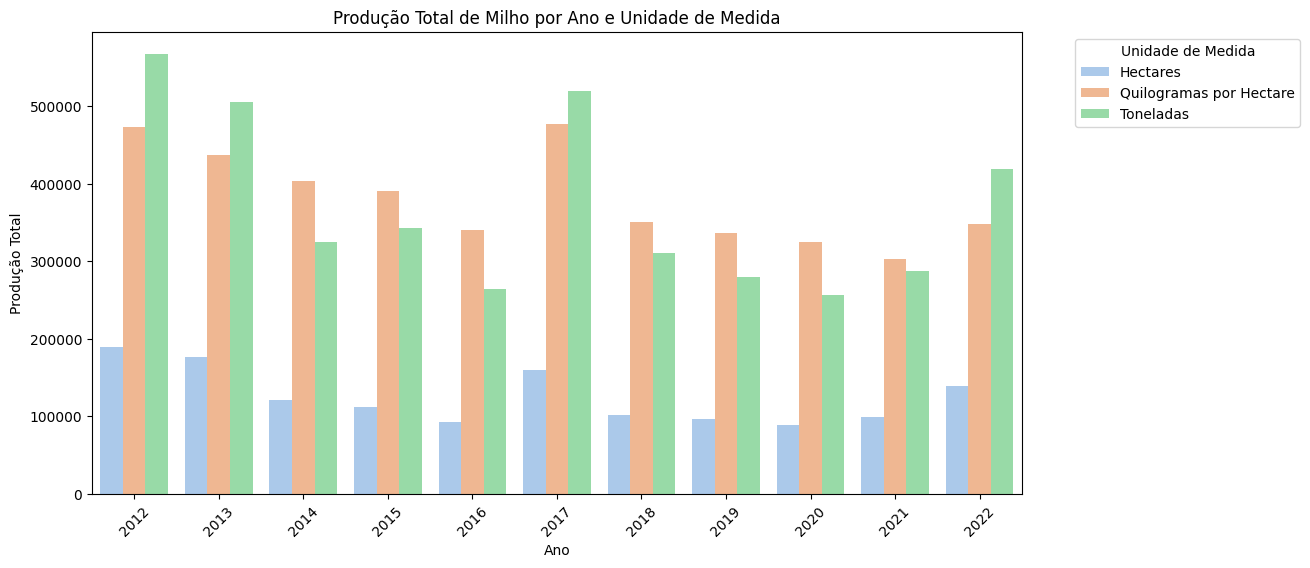

In [342]:
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
sns.barplot(data=unidade_milho_ano1, x='ano', y='producao_total', hue='unidade_medida')
plt.title('Produção Total de Milho por Ano e Unidade de Medida')
plt.xlabel('Ano')
plt.ylabel('Produção Total')
plt.legend(title='Unidade de Medida', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

É nítido que o milho da primeira safra tem um grafico mais irregular, corroborando com gráficos externos apresentados em que o milho da primeira safra perdeu espaço e investimento para o milho safrinha, que atingiu resultados melhores ao longo dos anos, tomando conta dos graficos de analise de colheita. Tivemos um aumento de hectares no ano de 2022 mas desde 2012 podemos apontar uma queda quase padrao desses numeros. Já quilogramas por hectare e toneladas de milho produzidas também tiveram um padrao mais voltado para a queda, tendo um aumento ali em 2022.

In [323]:
unidade_milho2 = milho_df_2.groupby('unidade_medida')['valor'].sum().reset_index()
unidade_milho2.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_milho2

,unidade_medida,producao_total
0,Hectares,86148235.0
1,Quilogramas por Hectare,6677125.0
2,Toneladas,247289003.0


Já para os dados da safrinha, temos:

<strong>Hectares</strong>: A produção total em hectares é de 86148235 hectares. </br>
<strong>Quilogramas por Hectare</strong>: A produção total em quilogramas por hectare é de 6677125 quilogramas por hectare. </br>
<strong>Toneladas</strong>: A produção total em toneladas é de 247289003 toneladas. Um número expressivo de produção em relação ao Milho da primeira safra.

In [331]:
unidade_milho_ano2 = milho_df_2.groupby(['unidade_medida', 'ano'])['valor'].sum().reset_index()
unidade_milho_ano2.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_milho_ano2

,unidade_medida,ano,producao_total
0,Hectares,2012,4594680.0
1,Hectares,2013,5834712.0
2,Hectares,2014,5819642.0
3,Hectares,2015,6240254.0
4,Hectares,2016,6704895.0
5,Hectares,2017,8357696.0
6,Hectares,2018,7874612.0
7,Hectares,2019,9026206.0
8,Hectares,2020,9624098.0
9,Hectares,2021,10437370.0


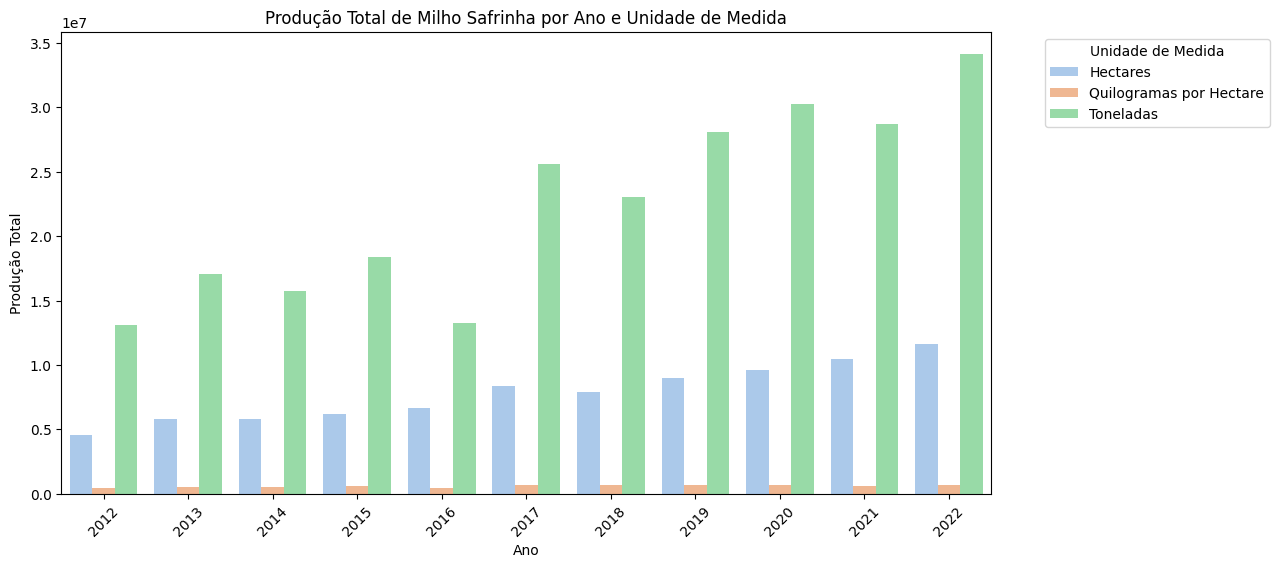

In [362]:
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
sns.barplot(data=unidade_milho_ano2, x='ano', y='producao_total', hue='unidade_medida')
plt.title('Produção Total de Milho Safrinha por Ano e Unidade de Medida')
plt.xlabel('Ano')
plt.ylabel('Produção Total')
plt.legend(title='Unidade de Medida', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Podemos analisar o grafico inferindo que, muito possivelmente, os números de quilograma por hectare não estão tão bons. Talvez haja alguma falha no registro. </br>
Existe um crescimento expressivo em relação as toneladas de produção mantendo um patamar muito próximo de hectares ao longo dos anos, o que pode ser um indicativo de maior aproveitamento do espaço cedido para o plantio da primeira safra de milho, trazendo otimização para esse processo, colhendo muito mais num espaço menor.

In [324]:
unidade_soja = soja_df.groupby('unidade_medida')['valor'].sum().reset_index()
unidade_soja.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_soja

,unidade_medida,producao_total
0,Hectares,108859682.0
1,Mil Reais,233841918.0
2,Quilogramas por Hectare,2424702.0
3,Toneladas,178619508.0


Para a soja, temos menos anos de dados registrados na base. 

<strong>Hectares</strong>: A produção total em hectares é de 108859682 hectares. </br>
<strong>Quilogramas por Hectare</strong>: A produção total em quilogramas por hectare é de 2424702 quilogramas por hectare. </br>
<strong>Toneladas</strong>: A produção total em toneladas é de 178619508 toneladas. Um número expressivo de produção em relação ao Milho da primeira safra. </br>
<strong>Mil Reais</strong>: Suponho que a unidade de medida seja em mil reais, portanto, concluo que o valor registrado seja de R$ 233.841.918.000,00 (mais de 233 bilhoes em 5 anos - 2016/2021)

In [332]:
unidade_soja_ano = soja_df.groupby(['unidade_medida', 'ano'])['valor'].sum().reset_index()
unidade_soja_ano.rename(columns={'valor': 'producao_total'}, inplace=True)
unidade_soja_ano

,unidade_medida,ano,producao_total
0,Hectares,2016,17027105.0
1,Hectares,2017,17326718.0
2,Hectares,2018,17693839.0
3,Hectares,2019,18258168.0
4,Hectares,2020,18820794.0
5,Hectares,2021,19733058.0
6,Mil Reais,2016,25597324.0
7,Mil Reais,2017,25657503.0
8,Mil Reais,2018,28001803.0
9,Mil Reais,2019,30638415.0


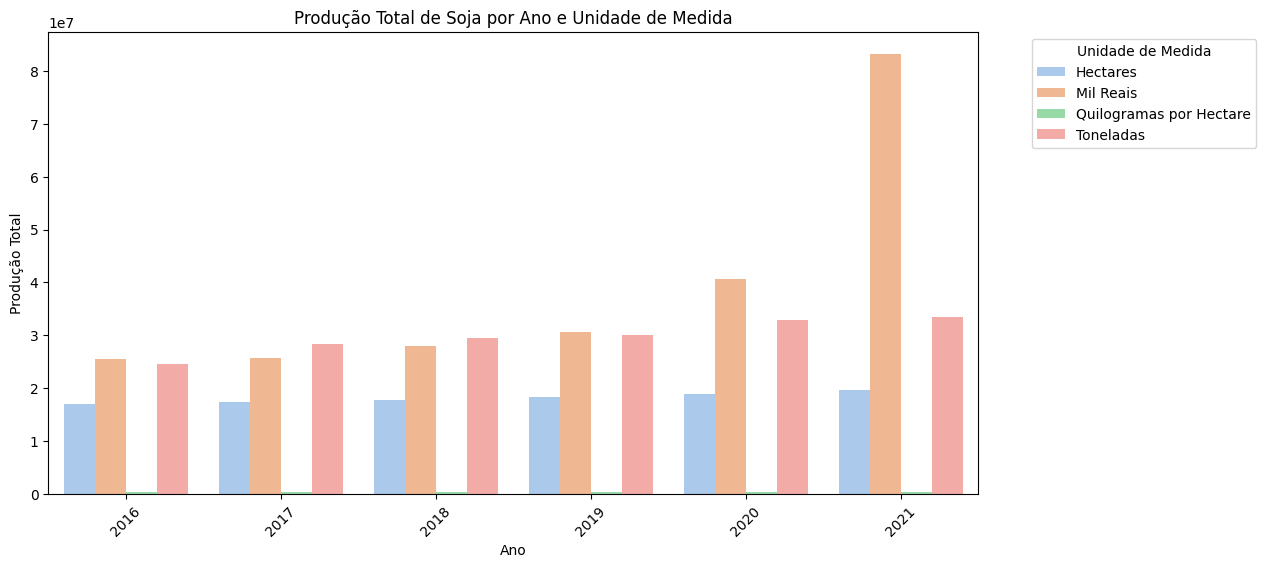

In [334]:
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
sns.barplot(data=unidade_soja_ano, x='ano', y='producao_total', hue='unidade_medida')
plt.title('Produção Total de Soja por Ano e Unidade de Medida')
plt.xlabel('Ano')
plt.ylabel('Produção Total')
plt.legend(title='Unidade de Medida', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

O plantio de soja tem tomado um espaço cada vez maior no nosso agronegocio e o grafico traz um pouco desse dado. Inferindo que a coluna de valor tenha a unidade de medida "Mil Reais" como valores obtidos com a venda da soja, podemos ver um salto imenso em 2021 em relacao aos outros anos, tendencia levemente exibida já em 2020. Nesse link, uma análise do IBGE chama atenção para o fato: [PAM 2020: valor da produção agrícola nacional cresce 30,4% e chega a R$ 470,5 bilhões, recorde da série](https://agenciadenoticias.ibge.gov.br/agencia-sala-de-imprensa/2013-agencia-de-noticias/releases/31672-pam-2020-valor-da-producao-agricola-nacional-cresce-30-4-e-chega-a-r-470-5-bilhoes-recorde-da-serie#:~:text=Soja%20%E2%80%93%20A%20produ%C3%A7%C3%A3o%20de%20soja,mais%20do%20que%20em%202019.). Pode-se notar que grandes valores foram alcançados mantendo praticamente os mesmos níveis de produção. Claro, houve uma grande influencia da pandemia também, quando o Brasil se fortaleceu como grande produtor de alimentos mundial.

<hr>

### Question 9

- Create a Rest API using python framework (e.g., django, fastapi, flask, tornado) in order to provide the data inside of crop_data.sql and ibge_municipios.json using as params: 
    - cod_variavel
    - cod_produto_lavouras_temporarias 
    - cod_ano
    - cod_municipio

- Try to provide a swagger to describe your API's structure.

- Try to host it in some cloud platform (e.g., heroku, pythonanywhere), and don't forget to provide the link to access it. Otherwise, prepare modules and run server/database in order to (1) run on some env: pip install requirements.txt; (2) them run server.py: python server.py.

- Share below a link to your Rest API code stored in a repository from GitHub.

In [3]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
python app.py
@app.route('/api/data', methods=['GET'])
def get_data():
    # Implement your logic here to fetch and return data
    return jsonify({'message': 'This is a sample API endpoint'})


In [ ]:
from flask import Flask
from flask_restplus import Api, Resource

app = Flask(__name__)
api = Api(app, version='1.0', title='Sample API', description='A sample API with Swagger documentation')

@api.route('/api/data')
class DataResource(Resource):
    def get(self):
        # Implement your logic here to fetch and return data
        return {'message': 'This is a sample API endpoint'}

if __name__ == '__main__':
    app.run()


<hr>

### Question 10

Make a python script in order to make many requests in parallel to your Rest API that you've created in the previous question.

<hr>